## **Desafio I Zetta Lab 2025**

Para esse desafio, foram baixados dados de `PRODES` [INPE/TerraBrasilis](https://terrabrasilis.dpi.inpe.br/app/map/deforestation?hl=pt-br). As variáveis socio​​econômicas foram extraidas da página do [IBGE](https://www.ibge.gov.br/cidades-e-estados/pa/). Há também o link do [Github](https://https://github.com/Ra-bit2/Codigos_Para), em que se encontra os codigos abaixo.

### PRODES

O PRODES (Projeto de Monitoramento do Desmatamento na Amazônia Legal por Satélite), conduzido pelo Instituto Nacional de Pesquisas Espaciais (INPE) desde 1988, é o principal sistema brasileiro de monitoramento do desmatamento por corte raso na Amazônia Legal. Utilizando imagens de satélite, o PRODES realiza anualmente o mapeamento das áreas desmatadas, fornecendo dados oficiais que são fundamentais para a formulação e avaliação de políticas públicas ambientais no Brasil. Esses dados são amplamente utilizados por órgãos governamentais, pesquisadores e organizações não governamentais para compreender a dinâmica do desmatamento e implementar ações de conservação e desenvolvimento sustentável na região.

### Primeiro vamos visualizar o desmatamento no estado do Pará desde 2020.

Para esse primeiro momento, vamos utilizar esses pacotes:

In [ ]:
Sys.setenv(MAKEFLAGS= paste0("-j",parallel::detectCores()))

print(parallel::detectCores())

if (!requireNamespace("geobr", quietly = TRUE)) {
  install.packages("geobr", verbose = TRUE, quiet = FALSE, dependencies = TRUE, INSTALL_opts = "--no-multiarch")
}

if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse", verbose = TRUE, quiet = FALSE, dependencies = TRUE, INSTALL_opts = "--no-multiarch")
}

if (!requireNamespace("colorspace", quietly = TRUE)) {
  install.packages("colorspace", verbose = TRUE, quiet = FALSE, dependencies = TRUE, INSTALL_opts = "--no-multiarch")
}

if (!requireNamespace("tidyr", quietly = TRUE)) {
  install.packages("tidyr", verbose = TRUE, quiet = FALSE, dependencies = TRUE, INSTALL_opts = "--no-multiarch")
}

if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2", verbose = TRUE, quiet = FALSE, dependencies = TRUE, INSTALL_opts = "--no-multiarch")
}

library(geobr)
library(tidyverse)
library(colorspace)
library(tidyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL --no-multiarch

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘lazyeval’, ‘classInt’, ‘s2’, ‘units’, ‘assertthat’, ‘checkmate’, ‘duckdb’, ‘rex’, ‘sf’, ‘arrow’, ‘censobr’, ‘covr’


foundpkgs: proxy, e1071, wk, lazyeval, classInt, s2, units, assertthat, checkmate, duckdb, rex, sf, arrow, censobr, covr, geobr, /tmp/Rtmp0lLj9W/downloaded_packages/proxy_0.4-27.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/e1071_1.7-16.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/wk_0.9.4.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/lazyeval_0.2.2.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/classInt_0.4-11.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/s2_1.1.7.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/units_0.8-7.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/assertthat_0.2.1.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/checkmate_2.3.2.tar.gz, /tmp/Rtmp0lLj9W/downloaded_packages/d

Utilizando o pacote geobr, vamos extrair os poligonos dos municipios para depois utilizar na plotagem

In [ ]:
mun_pa <- read_municipality(year = 2020, code_muni = "PA")

Using year/date 2020



Adicionando nossa base de dados

In [ ]:
dados <- read_delim("data.csv", delim  = ";", quote  = "\"",escape_double = TRUE,
  locale = locale(encoding = "UTF-8"),na= c("", "NA"))

Rows: 144 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): Municipio, Escolarizacao, IDHM
dbl (8): pop_censo, Mortalidade_infantil, PIB, 2020, 2021, 2022, 2023, 2024

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Adicionando a coluna geom nos nossos dados

In [ ]:
dados$Geom<-mun_pa$geom

### Agora vamos plotar o grafico dos valores de desmatamento por ano

Primeiro vamos organizar a nossa tabela

In [ ]:
comp_thin<-dados %>%
  gather(., key=year,value=Desmatamento,7:11)

comp_thin$Desmatamento<-as.numeric(comp_thin$Desmatamento)
comp_thin$year<-as.factor(comp_thin$year)
levels(comp_thin$year)<-c("2020","2021","2022","2023","2024")

### Agora vamos usar o pacote ggplot2 para gerar gráficos.

Nota-se que estamos utilizando cores viridis para que pessoas com daltonismo não tenham dificuldade na visualização.

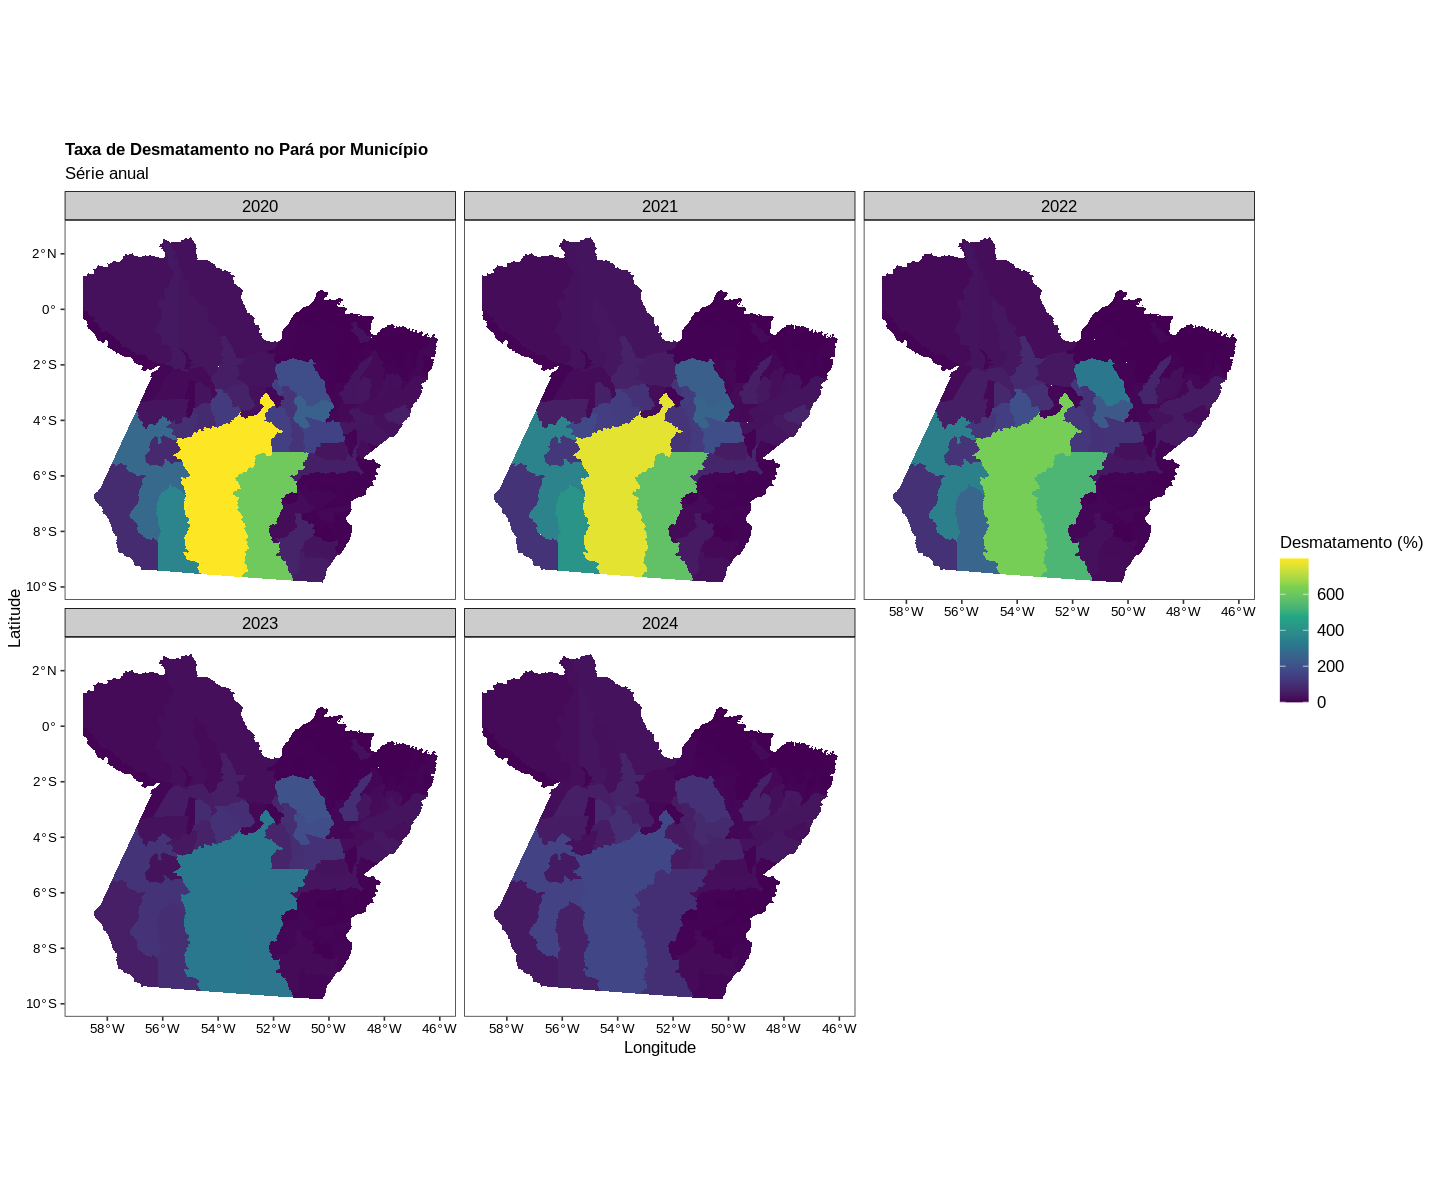

In [ ]:
grafico_1 <- ggplot(comp_thin) +
  geom_sf(
    data = comp_thin$Geom,
    aes(fill = comp_thin$Desmatamento),
    color = NA)+ facet_wrap(~ comp_thin$year) +
  scale_fill_viridis_c(
    option   = "viridis",
    name     = "Área Desmatada",
    na.value = "transparent"
  ) +
  labs(
    x        = "Longitude",
    y        = "Latitude",
    title    = "Taxa de Desmatamento no Pará por Município",
    subtitle = "Série anual"
  ) +
  theme_bw(base_size = 10) +
  theme(
    axis.text        = element_text(color = "black"),
    axis.title       = element_text(color = "black"),
    plot.title       = element_text(color = "black", size = 10, face = "bold"),
    plot.subtitle    = element_text(color = "black", size = 10),
    legend.text      = element_text(color = "black", size = 10),
    legend.title     = element_text(color = "black", size = 10),
    strip.text       = element_text(color = "black", size = 10),
    strip.background = element_rect(fill = "#CCCCCC", colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
options(repr.plot.width = 12, repr.plot.height = 10)
grafico_1


A partir dos gráficos gerados, percebe-se que a taxa de desmatamento foi mais intensa no período de 2020 a 2022, concentrados no sul do estado, localizado no arco do desmatamento. No último ano, os municípios com a maior taxa de desmatamento foram Altamira, Itaituba, Portel, São Felix do Xingu e Uruará. Entre 2023 e 2024, o Pará teve uma redução de 28,4% no desmatamento, resultado de uma maior fiscalização, maior consciencia ambiental da população e execução da Política Estadual sobre Mudanças Climáticas do Pará.

Para analisar os impactos socio​​econômicos do desmatamento, iremos utilizar dados da cobertura florestal com as variáveis:

*   Índice de Desenvolvimento Humano Municipal(IDHM);

*   Produto Interno Bruto por pessoa (PIB per capita);

*   Mortalidade infantil;

*   Escolarização de crianças entre 6 a 14 anos do estado.

Agora vamos analisar os municipios com os maiores valores de IDHM, PIB per capita, Mortalidade infantil e escolarização.


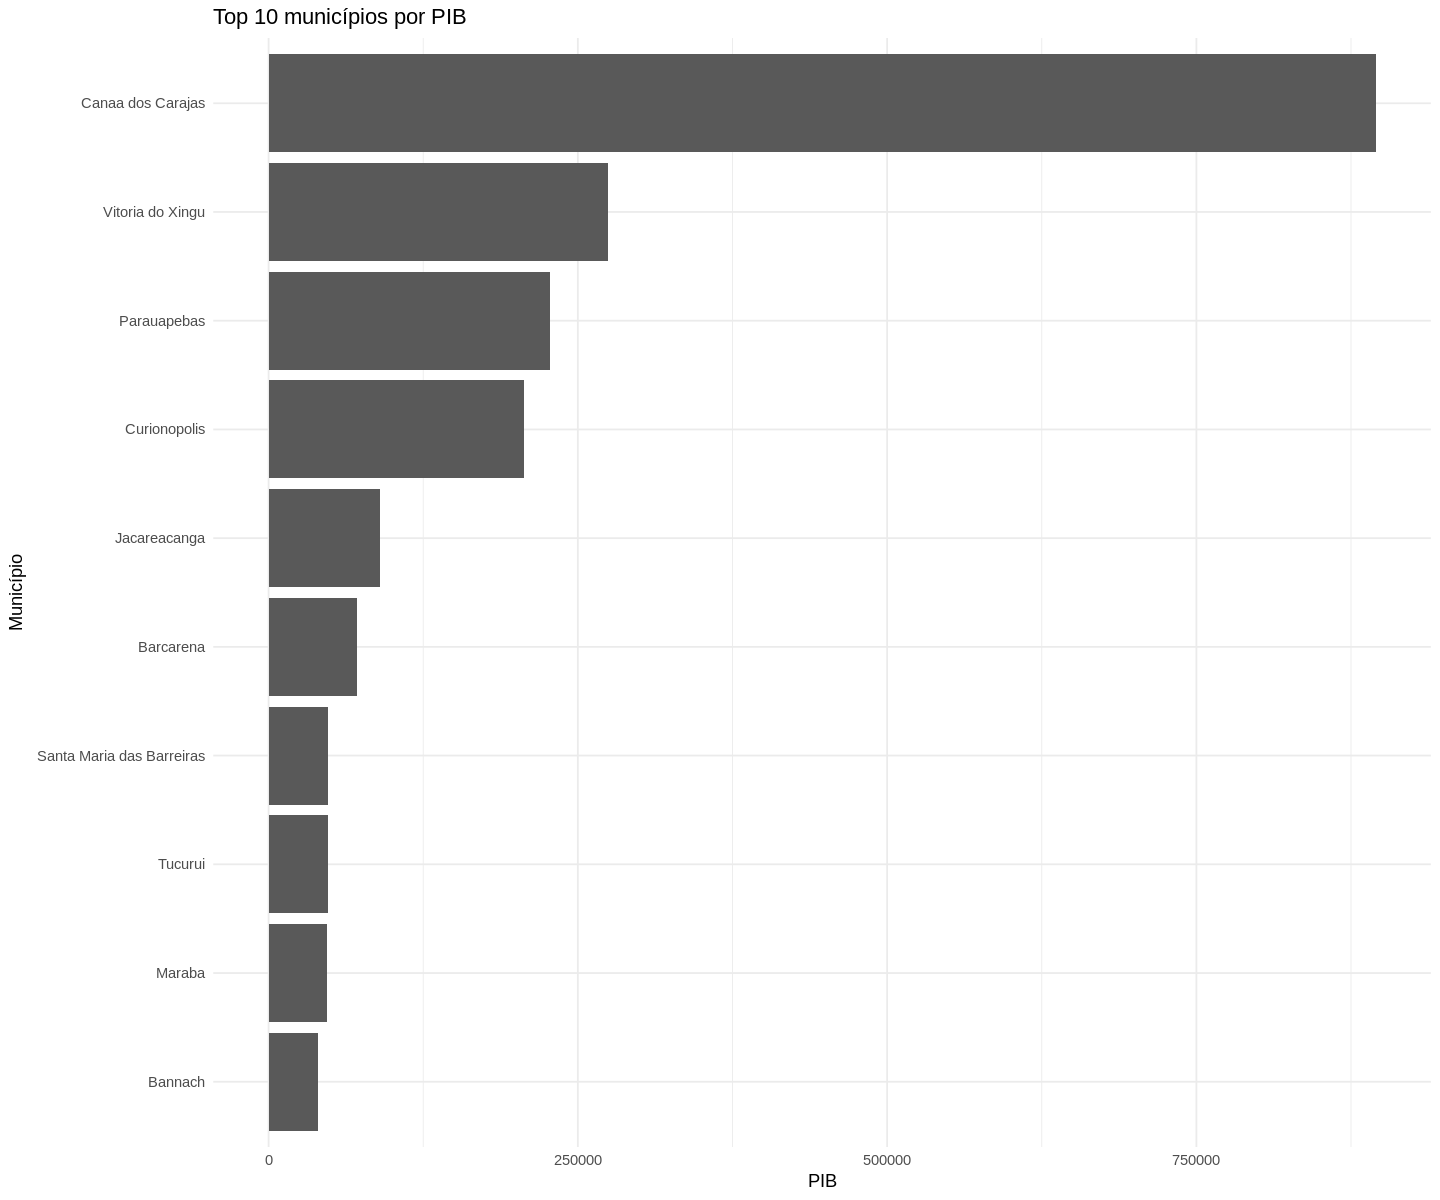

In [ ]:
pib_10 <- dados %>%
  arrange(desc(PIB)) %>%
  slice(1:10)

top10_pib<-ggplot(pib_10, aes(x = reorder(Municipio, PIB), y = PIB)) +
  geom_col() +
  coord_flip() +
  labs(x = "Município", y = "PIB", title = "Top 10 municípios por PIB") +
  theme_minimal()
top10_pib

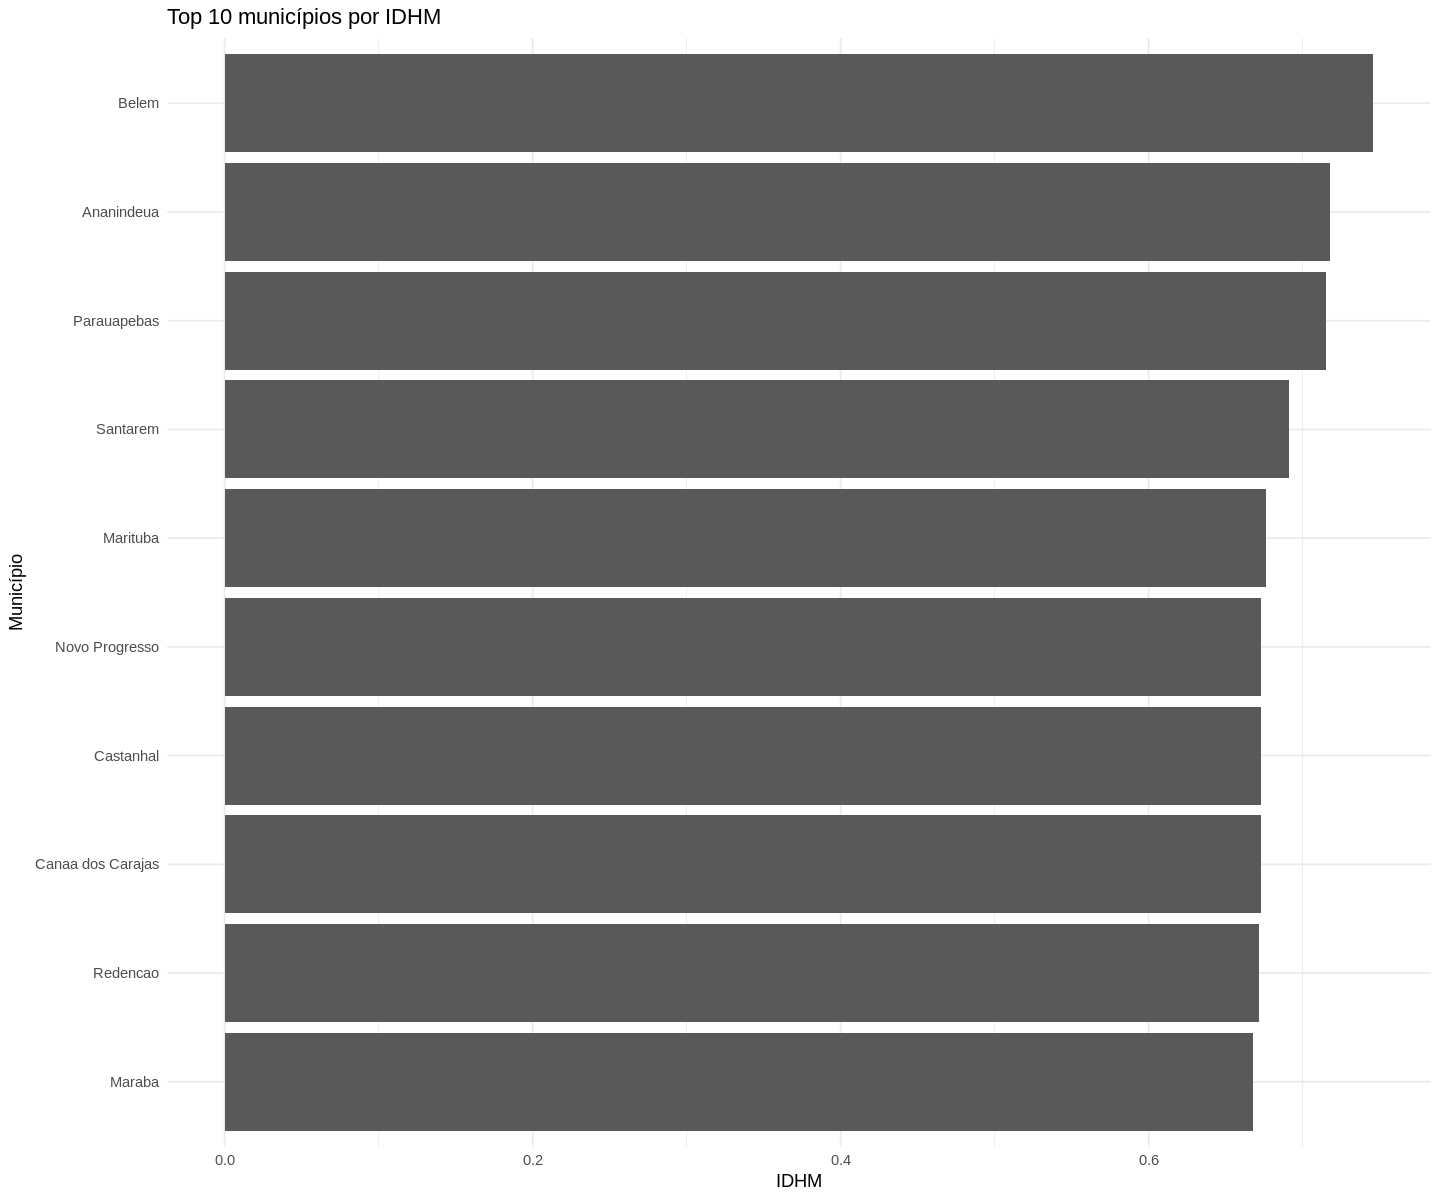

In [ ]:
dados$IDHM<-as.numeric(dados$IDHM)
idhm_10 <- dados %>%
  arrange(desc(IDHM)) %>%
  slice(1:10)

top10_IDHM<-ggplot(idhm_10, aes(x = reorder(Municipio, IDHM), y = IDHM)) +
  geom_col() +
  coord_flip() +
  labs(x = "Município", y = "IDHM", title = "Top 10 municípios por IDHM") +
  theme_minimal()
top10_IDHM

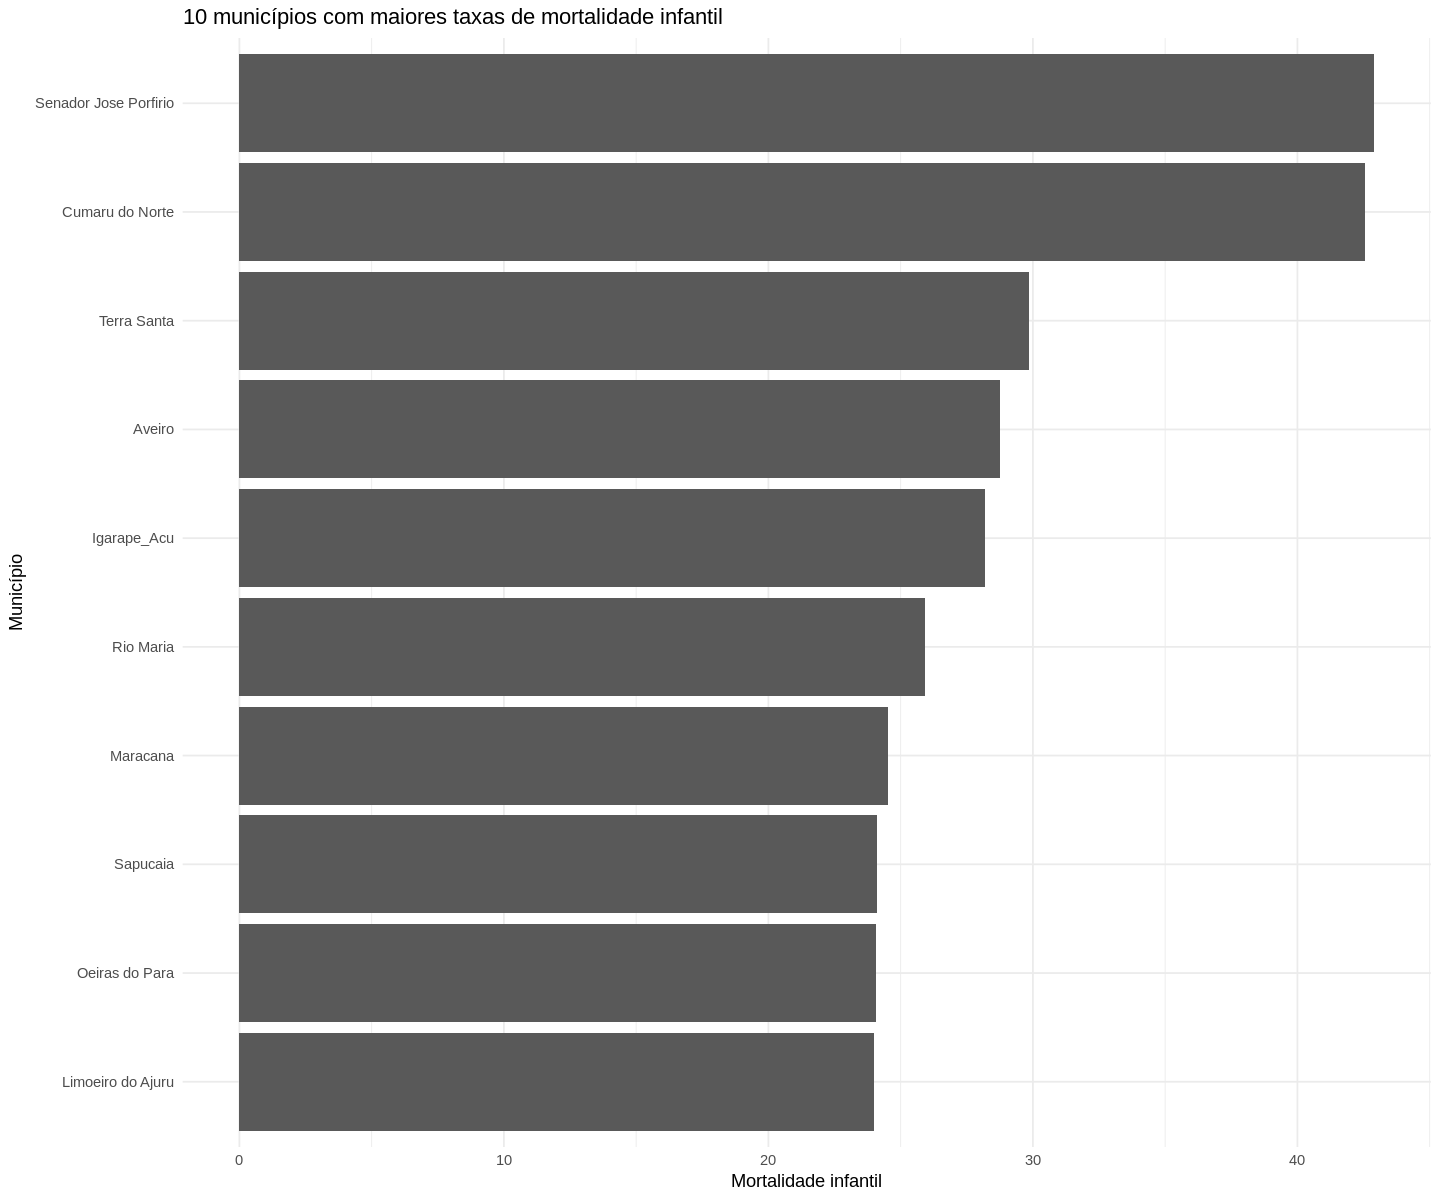

In [ ]:
mortalidade_10 <- dados %>%
  arrange(desc(Mortalidade_infantil)) %>%
  slice(1:10)

top10_mortalidade<-ggplot(mortalidade_10, aes(x = reorder(Municipio, Mortalidade_infantil), y = Mortalidade_infantil)) +
  geom_col() +
  coord_flip() +
  labs(x = "Município", y = "Mortalidade infantil", title = "10 municípios com maiores taxas de mortalidade infantil") +
  theme_minimal()
top10_mortalidade

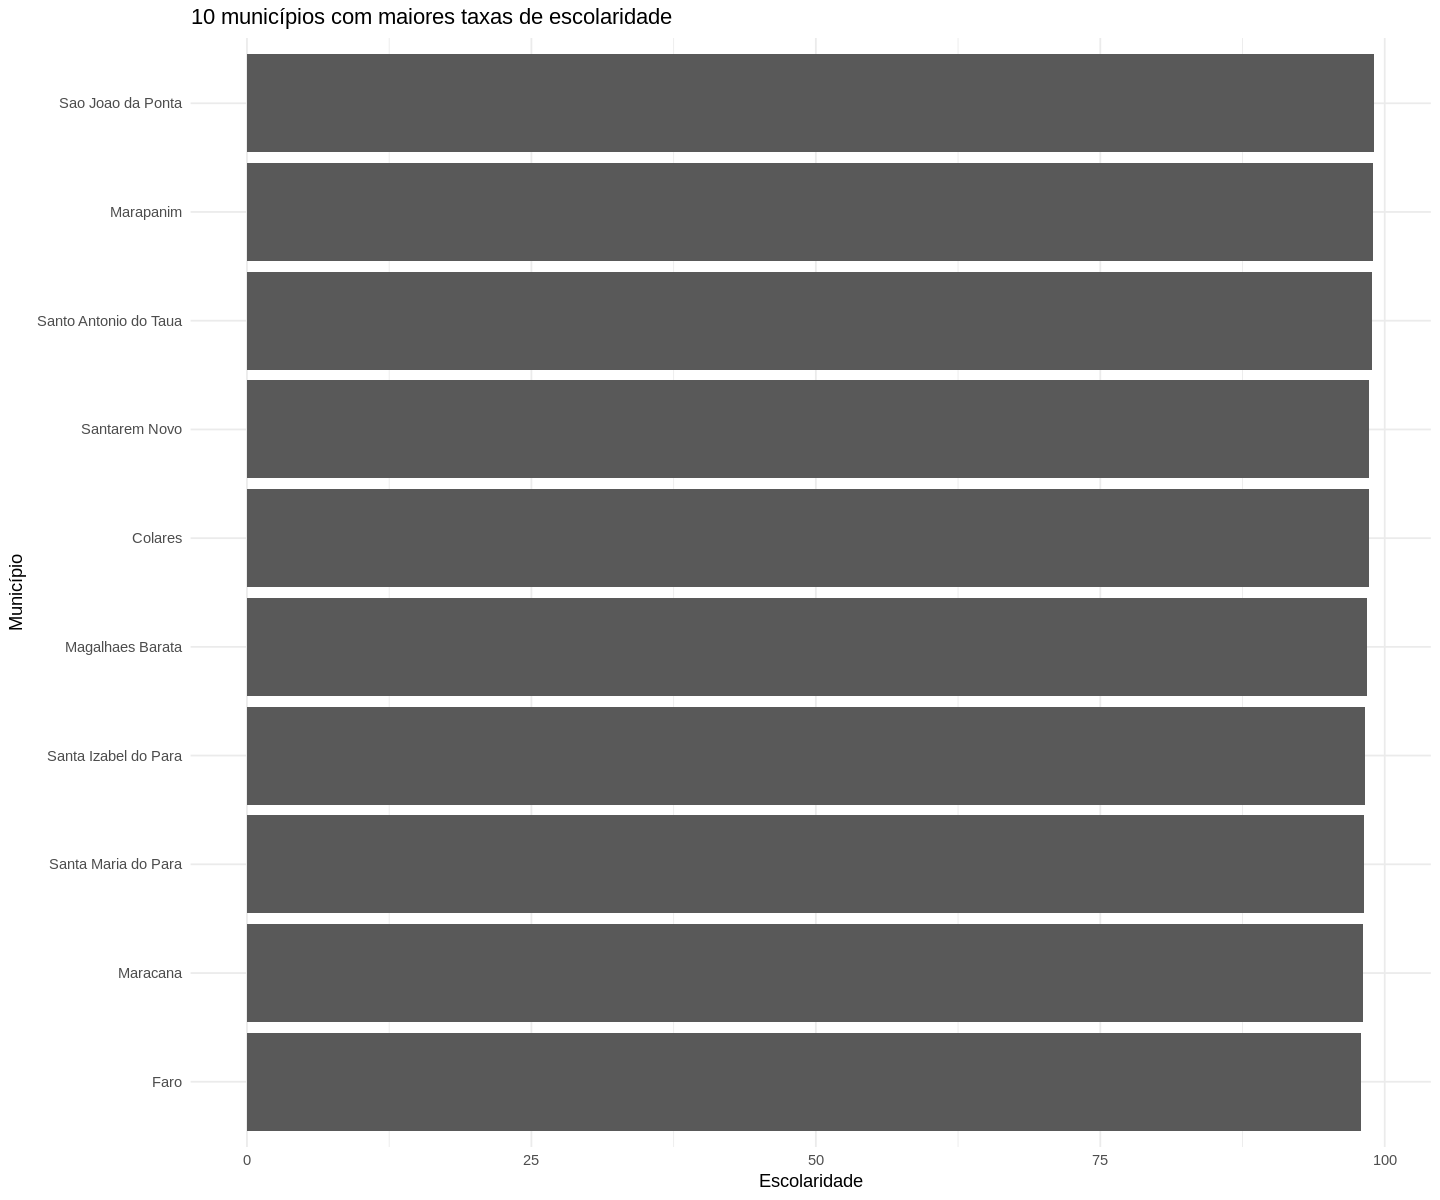

In [ ]:
dados$Escolarizacao<-as.numeric(dados$Escolarizacao)
escolaridade_10 <- dados %>%
  arrange(desc(Escolarizacao)) %>%
  slice(1:10)

top10_escolaridade<-ggplot(escolaridade_10, aes(x = reorder(Municipio, Escolarizacao), y = Escolarizacao)) +
  geom_col() +
  coord_flip() +
  labs(x = "Município", y = "Escolaridade", title = "10 municípios com maiores taxas de escolaridade") +
  theme_minimal()
top10_escolaridade

Para analisar a influencia das variaveis selecionadas no desmatamento, iremos fazer uma regressão linear simples.

In [ ]:
library(readxl)
library(dplyr)
library(readr)

df <- read_excel("dados2.xlsx") %>%
  rename(
    idhm           = IDHM,
    mort_inf       = Mortalidade_infantil,
    escolarizacao  = Escolarizacao
  ) %>%
  mutate(
    idhm           = parse_number(as.character(idhm), na = c("-", "")),
    mort_inf       = parse_number(as.character(mort_inf), na = c("-", "")),
    escolarizacao  = parse_number(as.character(escolarizacao), na = c("-", "")),
    pib            = as.numeric(PIB),
    desmat_2024    = as.numeric(`2024`)
  ) %>%
  filter(
    !is.na(desmat_2024),
    !is.na(idhm),
    !is.na(pib),
    !is.na(mort_inf),
    !is.na(escolarizacao)
  )

model <- lm(
  desmat_2024 ~ idhm + pib + mort_inf + escolarizacao,
  data = df
)

summary(model)


Call:
lm(formula = desmat_2024 ~ idhm + pib + mort_inf + escolarizacao, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.364 -12.987  -7.647   1.464 140.228 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.032e+02  5.423e+01   3.746 0.000263 ***
idhm           1.041e+02  4.871e+01   2.137 0.034384 *  
pib           -1.678e-05  2.911e-05  -0.576 0.565316    
mort_inf       4.835e-01  3.141e-01   1.539 0.125974    
escolarizacao -2.708e+00  6.605e-01  -4.099 7.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.07 on 138 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.1056 
F-statistic: 5.191 on 4 and 138 DF,  p-value: 0.0006319


A variável IDHM e a Escolarização foram significativas no modelo, em que a escolarização foi a mais significativa. O IDHM significa que um aumento de 0,01 ponto no IDHM está associado a +1,04 na taxa de desmatamento em 2024 (p=0.034).
Para a escolarização, cada ponto percentual a mais na taxa de escolarização reduz 2,71 de desmatamento (p<0.001). PIB e mortalidade infantil não foram estatisticamente significativos (p>0.1), indicando pouca relação linear direta com a taxa de desmate em 2024. O modelo resultou em um R ajustado baixo, em que poderia ser incluida mais variaveis explicativas no modelo.